In [42]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

pd.set_option('display.max_columns', None)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap function
def display_heatmap(dataframe):
    corr=dataframe.corr()
    mask=np.triu(np.ones_like(corr, dtype=bool))        # generate a mask for the upper triangle
    f, ax=plt.subplots(figsize=(15, 10))                # set up the matplotlib figure
    cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap
    sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
                center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5})
    corr = corr.apply(abs)
    return pd.DataFrame(corr[corr.columns[0]]).sort_values(by=corr.columns[0], ascending=False).T

In [44]:
ess = pd.read_csv('ESS10.csv')

/tmp/ipykernel_77149/1309307712.py:1: DtypeWarning: Columns (159,165,167,578) have mixed types. Specify dtype option on import or set low_memory=False.
  ess = pd.read_csv('ESS10.csv')


In [45]:
print(ess.columns[159],ess.columns[165],ess.columns[167],ess.columns[578])

cntbrthd fbrncntc mbrncntc kinwe


In [46]:
ess.dtypes.value_counts()

int64      385
float64    177
object      24
dtype: int64

In [47]:
# have to treat float columns:
# most of them are float because they contain NaNs (country specific stuff)
# BUT some not

# there is pandas type 'Int64' 
# which:    can treat nans as 'integers'
#           won't treat floats
#           can use max() method even with NaNs

# want to convert all float to Int64 if possible

for col in tqdm(ess.select_dtypes(np.number).columns):
    # use the nice properties of Int64 with a try-except
    try:
        ess[col] = ess[col].astype('Int64')
    except:
        print(col, 'is a true float col !')


  0%|          | 0/562 [00:00<?, ?it/s]

edition is a true float col !


  2%|▏         | 10/562 [00:00<00:05, 95.79it/s]

dweight is a true float col !
pspwght is a true float col !
pweight is a true float col !
anweight is a true float col !
prob is a true float col !


100%|██████████| 562/562 [00:04<00:00, 116.29it/s]


In [48]:
ess.dtypes.value_counts()

Int64      556
object      24
float64      6
dtype: int64

In [49]:
# test the nan filling with a random int-column
rand_column = ess.select_dtypes(int).columns[random.randint(0,len(ess.select_dtypes(int).columns)-1)]
ess[rand_column].value_counts(dropna=False)

<NA>    31502
66       1128
3         359
1          87
4          78
77         59
7          48
9          40
6          21
10          8
5           6
11          5
55          4
8           3
88          2
2           1
Name: prtclhhu, dtype: Int64

In [50]:
# replace nan filler with actual nans
for col in tqdm(ess.select_dtypes(int).columns):
    # fillers are either 6,7,8,9 times the number of digits of max of col OR the filler is max itself
    length = len(str(int(ess[col].max())))
    replace = [int(str(i)*length) for i in range (6,10)]
    ess[col] = ess[col].replace(replace, np.nan)

100%|██████████| 556/556 [00:00<00:00, 1039.02it/s]


In [51]:
ess[rand_column].value_counts(dropna=False)

<NA>    32691
3         359
1          87
4          78
7          48
9          40
6          21
10          8
5           6
11          5
55          4
8           3
2           1
Name: prtclhhu, dtype: Int64

In [52]:
obj_cols = ess.select_dtypes(object).columns   
# 'name', 'proddate', 'cntry', 'cntbrthd', 'lnghom1', 'lnghom2','fbrncntc', 'mbrncntc', 'region', 'inwds', 'ainws', 'ainwe', 'binwe','cinwe', 'dinwe', 'finwe', 'ginwe', 'hinwe', 'iinwe', 'kinwe', 'vinwe','inwde', 'jinws', 'jinwe'         

# we drop all but region & cntry             
ess = ess.drop([col for col in obj_cols if col not in ['cntry', 'region']] + ['psu','essround','edition','stratum','idno'], axis=1)
                                                                # constants, ids ... should get eliminated later anyway, 
                                                                #                    because of variance/multicoll
ess

,cntry,dweight,pspwght,pweight,anweight,prob,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,prtvtebg,prtvthch,prtvtbhr,prtvtecz,prtvthee,prtvtefi,prtvtefr,prtvtdgr,prtvtghu,prtvtdis,prtvtdit,prtvclt1,prtvclt2,prtvclt3,prtvtame,prtvthnl,prtvtmk,prtvtbno,prtvtdpt,prtvtfsi,prtvtesk,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtclebg,prtclhch,prtclbhr,prtclecz,prtclhee,prtclffi,prtclffr,prtcldgr,prtclhhu,prtcldis,prtcleit,prtclclt,prtclame,prtclgnl,prtclmk,prtclbno,prtclfpt,prtclfsi,prtclesk,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnach,rlgdnafi,rlgdnagr,rlgdnhu,rlgdnais,rlgdnlt,rlgdme,rlgdnanl,rlgdnmk,rlgdnno,rlgdnbsk,rlgblge,rlgdnme,rlgdeach,rlgdeafi,rlgdeagr,rlgdehu,rlgdeais,rlgdelt,rlgdeme,rlgdeanl,rlgdemk,rlgdeno,rlgdebsk,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,feethngr,facntr,mocntr,ccnthum,ccrdprs,wrclmch,admrclc,testic34,testic35,testic36,testic37,testic38,testic39,testic40,testic41,testic42,vteurmmb,vteubcmb,fairelc,dfprtal,medcrgv,rghmgpr,votedir,cttresa,gptpelc,gvctzpv,grdfinc,viepol,wpestop,keydec,fairelcc,dfprtalc,medcrgvc,rghmgprc,votedirc,cttresac,gptpelcc,gvctzpvc,grdfincc,viepolc,wpestopc,keydecc,chpldm,chpldmi,chpldmc,stpldmi,stpldmc,admit,showcv,impdema,impdemb,impdemc,impdemd,impdeme,implvdm,accalaw,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,gndr13,yrbrn,agea,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,yrbrn13,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,rshipa13,rshpsts,rshpsmk,lvgptnea,dvrcdeva,marsts,marstmk,maritalb,chldhhe,domicil,edulvlb,eisced,edlvebg,edlvdch,edlvehr,edlvdcz,edlvdee,edlvdfi,edlvdfr,edlvegr,edlvdahu,edlvdis,edlveit,edlvdlt,edlvdme,edlvenl,edlvdmk,edlveno,edlvdpt,edlvesi,edlvdsk,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,mainact,mnactic,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlpb,eiscedp,edlvpebg,edlvpdch,edlvpehr,edlvpdcz,edlvpdee,edlvpdfi,edlvpdfr,edlvpegr,edlvpdahu,edlvpdis,edlvpeit,edlvpdlt,edlvpdme,edlvpenl,edlvpdmk,edlvpeno,edlvpdpt,edlvpesi,edlvpdsk,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,mnactp,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfebg,edlvfdch,edlvfehr,edlvfdcz,edlvfdee,edlvfdfi,edlvfdfr,edlvfegr,edlvfdahu,edlvfdis,edlvfeit,edlvfdlt,edlvfdme,edlvfenl,edlvfdmk,edlvfeno,edlvfdpt,edlvfesi,edlvfdsk,emprf14,occf14b,edulvlmb,eiscedm,edlvmebg,edlvmdch,edlvmehr,edlvmdcz,edlvmdee,edlvmdfi,edlvmdfr,edlvmegr,edlvmdahu,edlvmdis,edlvmeit,edlvmdlt,edlvmdme,edlvmenl,edlvmdmk,edlvmeno,edlvmdpt,edlvmesi,edlvmdsk,emprm14,occm14b,atncrse,anctry1,anctry2,regunit,region,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,fampdf,mcclose,mcinter,mccoord,mcpriv,mcmsinf,chldo12,gndro12a,gndro12b,ageo12,hhlio12,closeo12,ttmino12,speako12,scrno12,phoneo12,como12,c19spo12,c19mco12,livpnt,pntmofa,agepnt,hhlipnt,closepnt,ttminpnt,speakpnt,scrnpnt,phonepnt,compnt,c19sppnt,c19mcpnt,stfmjob,trdawrk,jbprtfp,pfmfdjba,dcsfwrka,wrkhome,c19whome,c19wplch,wrklong,wrkresp,c19whacc,mansupp,manhlp,manwrkpl,manspeak,manscrn,manphone,mancom,teamfeel,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iply

In [53]:
# in the following i will filter columns i want to inspect in my project
# this selection can be made very differently, but the data is now prepared for it

thresh = 1.0

nulls_percent_df = pd.DataFrame(ess.isna().sum()/len(ess)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
display(nulls_percent_df.T.reset_index(drop=True))
cols_under_threshold = list(nulls_percent_df[nulls_percent_df['nulls_percentage']<thresh]['column_name'])

ess[cols_under_threshold]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558
0,cntry,dweight,pspwght,pweight,anweight,prob,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,prtvtebg,prtvthch,prtvtbhr,prtvtecz,prtvthee,prtvtefi,prtvtefr,prtvtdgr,prtvtghu,prtvtdis,prtvtdit,prtvclt1,prtvclt2,prtvclt3,prtvtame,prtvthnl,prtvtmk,prtvtbno,prtvtdpt,prtvtfsi,prtvtesk,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtclebg,prtclhch,prtclbhr,prtclecz,prtclhee,prtclffi,prtclffr,prtcldgr,prtclhhu,prtcldis,prtcleit,prtclclt,prtclame,prtclgnl,prtclmk,prtclbno,prtclfpt,prtclfsi,prtclesk,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnach,rlgdnafi,rlgdnagr,rlgdnhu,rlgdnais,rlgdnlt,rlgdme,rlgdnanl,rlgdnmk,rlgdnno,rlgdnbsk,rlgblge,rlgdnme,rlgdeach,rlgdeafi,rlgdeagr,rlgdehu,rlgdeais,rlgdelt,rlgdeme,rlgdeanl,rlgdemk,rlgdeno,rlgdebsk,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,feethngr,facntr,mocntr,ccnthum,ccrdprs,wrclmch,admrclc,testic34,testic35,testic36,testic37,testic38,testic39,testic40,testic41,testic42,vteurmmb,vteubcmb,fairelc,dfprtal,medcrgv,rghmgpr,votedir,cttresa,gptpelc,gvctzpv,grdfinc,viepol,wpestop,keydec,fairelcc,dfprtalc,medcrgvc,rghmgprc,votedirc,cttresac,gptpelcc,gvctzpvc,grdfincc,viepolc,wpestopc,keydecc,chpldm,chpldmi,chpldmc,stpldmi,stpldmc,admit,showcv,impdema,impdemb,impdemc,impdemd,impdeme,implvdm,accalaw,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,gndr13,yrbrn,agea,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10

,cntry,dweight,pspwght,pweight,anweight,prob,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,prtvtebg,prtvthch,prtvtbhr,prtvtecz,prtvthee,prtvtefi,prtvtefr,prtvtdgr,prtvtghu,prtvtdis,prtvtdit,prtvclt1,prtvclt2,prtvclt3,prtvtame,prtvthnl,prtvtmk,prtvtbno,prtvtdpt,prtvtfsi,prtvtesk,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtclebg,prtclhch,prtclbhr,prtclecz,prtclhee,prtclffi,prtclffr,prtcldgr,prtclhhu,prtcldis,prtcleit,prtclclt,prtclame,prtclgnl,prtclmk,prtclbno,prtclfpt,prtclfsi,prtclesk,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnach,rlgdnafi,rlgdnagr,rlgdnhu,rlgdnais,rlgdnlt,rlgdme,rlgdnanl,rlgdnmk,rlgdnno,rlgdnbsk,rlgblge,rlgdnme,rlgdeach,rlgdeafi,rlgdeagr,rlgdehu,rlgdeais,rlgdelt,rlgdeme,rlgdeanl,rlgdemk,rlgdeno,rlgdebsk,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,feethngr,facntr,mocntr,ccnthum,ccrdprs,wrclmch,admrclc,testic34,testic35,testic36,testic37,testic38,testic39,testic40,testic41,testic42,vteurmmb,vteubcmb,fairelc,dfprtal,medcrgv,rghmgpr,votedir,cttresa,gptpelc,gvctzpv,grdfinc,viepol,wpestop,keydec,fairelcc,dfprtalc,medcrgvc,rghmgprc,votedirc,cttresac,gptpelcc,gvctzpvc,grdfincc,viepolc,wpestopc,keydecc,chpldm,chpldmi,chpldmc,stpldmi,stpldmc,admit,showcv,impdema,impdemb,impdemc,impdemd,impdeme,implvdm,accalaw,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,yrbrn,agea,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,rshpsts,rshpsmk,lvgptnea,dvrcdeva,marsts,marstmk,maritalb,chldhhe,domicil,edulvlb,eisced,edlvebg,edlvdch,edlvehr,edlvdcz,edlvdee,edlvdfi,edlvdfr,edlvegr,edlvdahu,edlvdis,edlveit,edlvdlt,edlvdme,edlvenl,edlvdmk,edlveno,edlvdpt,edlvesi,edlvdsk,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,mainact,mnactic,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlpb,eiscedp,edlvpebg,edlvpdch,edlvpehr,edlvpdcz,edlvpdee,edlvpdfi,edlvpdfr,edlvpegr,edlvpdahu,edlvpdis,edlvpeit,edlvpdlt,edlvpdme,edlvpenl,edlvpdmk,edlvpeno,edlvpdpt,edlvpesi,edlvpdsk,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,mnactp,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfebg,edlvfdch,edlvfehr,edlvfdcz,edlvfdee,edlvfdfi,edlvfdfr,edlvfegr,edlvfdahu,edlvfdis,edlvfeit,edlvfdlt,edlvfdme,edlvfenl,edlvfdmk,edlvfeno,edlvfdpt,edlvfesi,edlvfdsk,emprf14,occf14b,edulvlmb,eiscedm,edlvmebg,edlvmdch,edlvmehr,edlvmdcz,edlvmdee,edlvmdfi,edlvmdfr,edlvmegr,edlvmdahu,edlvmdis,edlvmeit,edlvmdlt,edlvmdme,edlvmenl,edlvmdmk,edlvmeno,edlvmdpt,edlvmesi,edlvmdsk,emprm14,occm14b,atncrse,anctry1,anctry2,regunit,region,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,fampdf,mcclose,mcinter,mccoord,mcpriv,mcmsinf,chldo12,gndro12a,gndro12b,ageo12,hhlio12,closeo12,ttmino12,speako12,scrno12,phoneo12,como12,c19spo12,c19mco12,livpnt,pntmofa,agepnt,hhlipnt,closepnt,ttminpnt,speakpnt,scrnpnt,phonepnt,compnt,c19sppnt,c19mcpnt,stfmjob,trdawrk,jbprtfp,pfmfdjba,dcsfwrka,wrkhome,c19whome,c19wplch,wrklong,wrkresp,c19whacc,mansupp,manhlp,manwrkpl,manspeak,manscrn,manphone,mancom,teamfeel,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfu

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# drop sample-data columns
ess = ess[cols_under_threshold].drop(['dweight', 'pspwght', 'pweight', 'anweight', 'prob'], axis=1)

In [56]:
# two options here: fill nans with mean or look at distribution and fill more precise

# option 1
for col in ess.columns:
    if ess[col].dtype != object:
        ess[col] = ess[col].fillna(round(ess[col].mean()))
ess

#option 2

,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,trstsci,vote,prtvtebg,prtvthch,prtvtbhr,prtvtecz,prtvthee,prtvtefi,prtvtefr,prtvtdgr,prtvtghu,prtvtdis,prtvtdit,prtvclt1,prtvclt2,prtvclt3,prtvtame,prtvthnl,prtvtmk,prtvtbno,prtvtdpt,prtvtfsi,prtvtesk,contplt,donprty,badge,sgnptit,pbldmna,bctprd,pstplonl,volunfp,clsprty,prtclebg,prtclhch,prtclbhr,prtclecz,prtclhee,prtclffi,prtclffr,prtcldgr,prtclhhu,prtcldis,prtcleit,prtclclt,prtclame,prtclgnl,prtclmk,prtclbno,prtclfpt,prtclfsi,prtclesk,prtdgcl,lrscale,stflife,stfeco,stfgov,stfdem,stfedu,stfhlth,gincdif,freehms,hmsfmlsh,hmsacld,euftf,lrnobed,loylead,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,happy,sclmeet,inprdsc,sclact,crmvct,aesfdrk,health,hlthhmp,atchctr,atcherp,rlgblg,rlgdnm,rlgdnach,rlgdnafi,rlgdnagr,rlgdnhu,rlgdnais,rlgdnlt,rlgdme,rlgdnanl,rlgdnmk,rlgdnno,rlgdnbsk,rlgblge,rlgdnme,rlgdeach,rlgdeafi,rlgdeagr,rlgdehu,rlgdeais,rlgdelt,rlgdeme,rlgdeanl,rlgdemk,rlgdeno,rlgdebsk,rlgdgr,rlgatnd,pray,dscrgrp,dscrrce,dscrntn,dscrrlg,dscrlng,dscretn,dscrage,dscrgnd,dscrsex,dscrdsb,dscroth,dscrdk,dscrref,dscrnap,dscrna,ctzcntr,brncntr,livecnta,feethngr,facntr,mocntr,ccnthum,ccrdprs,wrclmch,admrclc,testic34,testic35,testic36,testic37,testic38,testic39,testic40,testic41,testic42,vteurmmb,vteubcmb,fairelc,dfprtal,medcrgv,rghmgpr,votedir,cttresa,gptpelc,gvctzpv,grdfinc,viepol,wpestop,keydec,fairelcc,dfprtalc,medcrgvc,rghmgprc,votedirc,cttresac,gptpelcc,gvctzpvc,grdfincc,viepolc,wpestopc,keydecc,chpldm,chpldmi,chpldmc,stpldmi,stpldmc,admit,showcv,impdema,impdemb,impdemc,impdemd,impdeme,implvdm,accalaw,hhmmb,gndr,gndr2,gndr3,gndr4,gndr5,gndr6,gndr7,gndr8,gndr9,gndr10,gndr11,gndr12,yrbrn,agea,yrbrn2,yrbrn3,yrbrn4,yrbrn5,yrbrn6,yrbrn7,yrbrn8,yrbrn9,yrbrn10,yrbrn11,yrbrn12,rshipa2,rshipa3,rshipa4,rshipa5,rshipa6,rshipa7,rshipa8,rshipa9,rshipa10,rshipa11,rshipa12,rshpsts,rshpsmk,lvgptnea,dvrcdeva,marsts,marstmk,maritalb,chldhhe,domicil,edulvlb,eisced,edlvebg,edlvdch,edlvehr,edlvdcz,edlvdee,edlvdfi,edlvdfr,edlvegr,edlvdahu,edlvdis,edlveit,edlvdlt,edlvdme,edlvenl,edlvdmk,edlveno,edlvdpt,edlvesi,edlvdsk,eduyrs,pdwrk,edctn,uempla,uempli,dsbld,rtrd,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,mainact,mnactic,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlpb,eiscedp,edlvpebg,edlvpdch,edlvpehr,edlvpdcz,edlvpdee,edlvpdfi,edlvpdfr,edlvpegr,edlvpdahu,edlvpdis,edlvpeit,edlvpdlt,edlvpdme,edlvpenl,edlvpdmk,edlvpeno,edlvpdpt,edlvpesi,edlvpdsk,pdwrkp,edctnp,uemplap,uemplip,dsbldp,rtrdp,cmsrvp,hswrkp,dngothp,dngdkp,dngnapp,dngrefp,dngnap,mnactp,crpdwkp,isco08p,emprelp,wkhtotp,edulvlfb,eiscedf,edlvfebg,edlvfdch,edlvfehr,edlvfdcz,edlvfdee,edlvfdfi,edlvfdfr,edlvfegr,edlvfdahu,edlvfdis,edlvfeit,edlvfdlt,edlvfdme,edlvfenl,edlvfdmk,edlvfeno,edlvfdpt,edlvfesi,edlvfdsk,emprf14,occf14b,edulvlmb,eiscedm,edlvmebg,edlvmdch,edlvmehr,edlvmdcz,edlvmdee,edlvmdfi,edlvmdfr,edlvmegr,edlvmdahu,edlvmdis,edlvmeit,edlvmdlt,edlvmdme,edlvmenl,edlvmdmk,edlvmeno,edlvmdpt,edlvmesi,edlvmdsk,emprm14,occm14b,atncrse,anctry1,anctry2,regunit,region,acchome,accwrk,accmove,accoth,accnone,accref,accdk,accna,fampref,famadvs,fampdf,mcclose,mcinter,mccoord,mcpriv,mcmsinf,chldo12,gndro12a,gndro12b,ageo12,hhlio12,closeo12,ttmino12,speako12,scrno12,phoneo12,como12,c19spo12,c19mco12,livpnt,pntmofa,agepnt,hhlipnt,closepnt,ttminpnt,speakpnt,scrnpnt,phonepnt,compnt,c19sppnt,c19mcpnt,stfmjob,trdawrk,jbprtfp,pfmfdjba,dcsfwrka,wrkhome,c19whome,c19wplch,wrklong,wrkresp,c19whacc,mansupp,manhlp,manwrkpl,manspeak,manscrn,manphone,mancom,teamfeel,wrkextra,colprop,colhlp,colspeak,colscrn,colphone,colcom,c19spwrk,c19mcwrk,mcwrkhom,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,testii1,testii2,testii3,testii4,test

In [57]:
from sklearn.preprocessing import MinMaxScaler

def split_scale(df, target):
    X_nums = df.select_dtypes(np.number).drop([target],axis=1)
    y = df[target].astype(int)

    scaler = MinMaxScaler().fit(X_nums)
    nums_scaled = pd.DataFrame(scaler.transform(X_nums))
    nums_scaled.columns = X_nums.columns
    return nums_scaled, y

In [58]:
from sklearn.feature_selection import VarianceThreshold 

def get_high_var_cols(nums_scaled, n):
    var = VarianceThreshold() # default is threshold = 0 :eliminate all coumns that are identical for all rows

    var = var.fit(nums_scaled)
    column_vars = pd.DataFrame(data=(nums_scaled.columns, var.variances_), index=('column_name','variance')).T 

    top_vars = column_vars.sort_values(by='variance', ascending=False).head(n)['column_name'].values

    nums_for_sel = nums_scaled[top_vars]
    return nums_for_sel

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def get_kbest_feats(nums_for_sel, y, n):
    kbest = SelectKBest(chi2, k=n).fit(nums_for_sel, y)

    # select the k best features
    df = pd.DataFrame(data = kbest.scores_, columns = ['score'])
    df['Column'] = nums_for_sel.columns
    top_kbest = df.sort_values(by = ['score'], ascending = False).head(n)
    return top_kbest['Column'].values
    

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression

def get_rfe_feats(nums_for_sel, y, n):
    rfe = RFE(LinearRegression(), n_features_to_select=n, verbose=1, step=10) # steps because i dont have the tiiiiiime 
    rfe.fit(nums_for_sel, y)

    df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
    df['Column_name'] = pd.DataFrame(nums_for_sel).columns
    top_rfe = df[df['Rank']==1]
    return top_rfe['Column_name'].values

In [61]:
def result(df, target, features, n=20):
    X_scaled, y = split_scale(ess, target)
    X_scaled = get_high_var_cols(X_scaled, 200)
    try:
        feats = features(X_scaled, y, n)
    except:
        feats = [feature for feature in features if feature in X_scaled.columns] 

    X_scaled = X_scaled[feats]
    display(display_heatmap(pd.concat([y, X_scaled], axis=1)))
    # return X_scaled, y
    return df[feats], y

,happy,hincfel,health,stfeco,stfdem,trstprl,trstlgl,netusoft,trstplt,fampdf,famadvs,fampref,accnone,accmove,freehms,accwrk,dngnapp,pdwrkp,accoth,livpnt,hapnpc19
happy,1.0,0.351541,0.324193,0.320787,0.279584,0.261408,0.249135,0.247166,0.229708,0.228046,0.211475,0.202907,0.18661,0.181381,0.17275,0.170223,0.162972,0.160188,0.157693,0.147901,0.101095


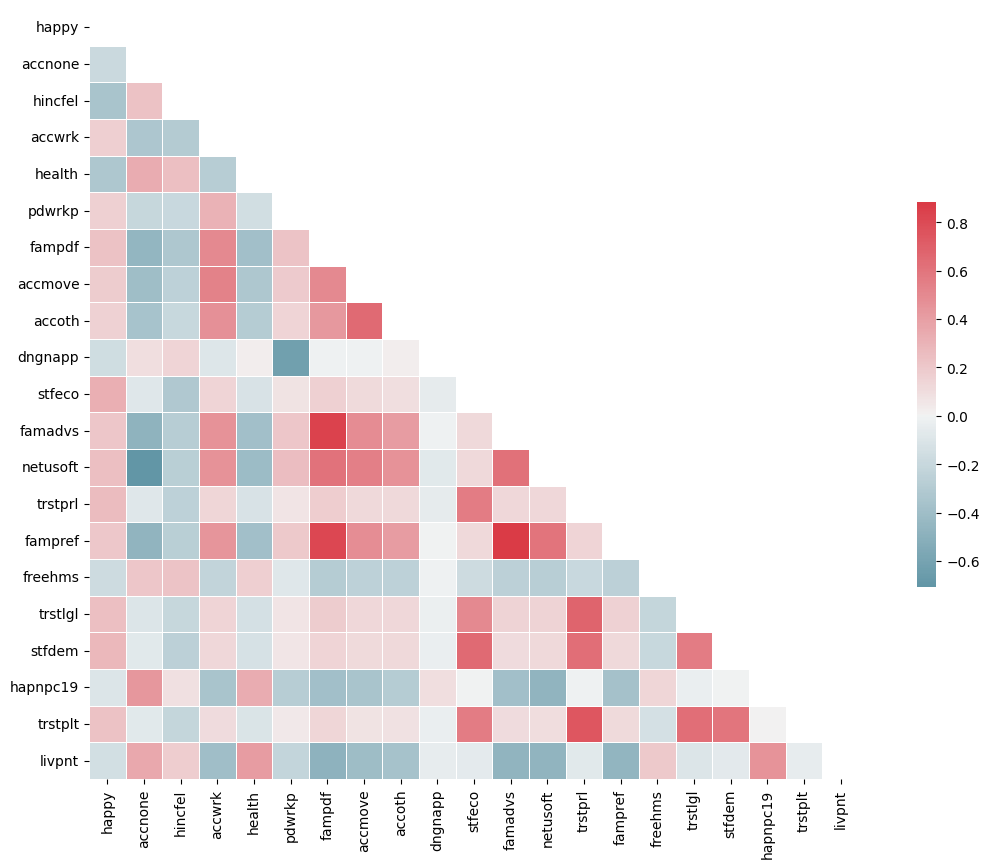

In [62]:
r = result(ess, 'happy', get_kbest_feats, 20)

In [63]:
### following are some custom feature selections

,trstprl,hincfel,polintr,mcwrkhom,netusoft,mcclose,mcinter,agea,mcpriv,rlgdgr,domicil
trstprl,1.0,0.249455,0.245501,0.130265,0.130008,0.107986,0.070176,0.036941,0.028244,0.013687,0.000321


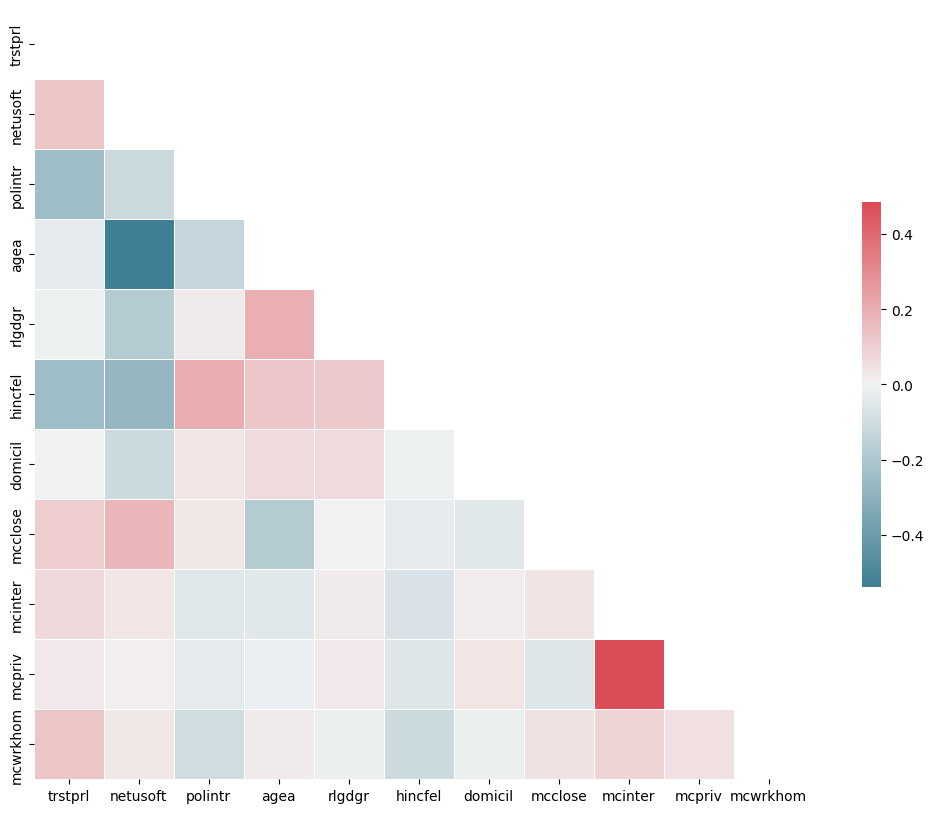

In [64]:
fets = [
    'netusoft', 'netustm', 'nwspol', 'polintr', 'eisced', 'agea', 'mainact', 'happy', 'rlgdgr', 'hincfel', 'domicil', 'stflife'
] + [t for t in ess.columns if t.startswith('mc')       # online/mobile communication
]

r = result(ess, 'trstprl', fets, 20)

,netusoft,accnone,acchome,accmove,agea,accwrk,accoth,mnactic,health,hincfel,inprdsc,sclmeet,rlgdgr,ppltrst,sgnptit,rlgblg,mcclose,pplfair,trstlgl,accalaw,pplhlp,trstprl,stfeco,stfdem,polintr,atcherp,domicil,trstprt,trstun,trstplt,stfhlth,trstep,trstplc,pbldmna,stfedu,stfgov,mcinter,mcwrkhom,gndr,mcpriv
netusoft,1.0,0.705513,0.692088,0.548953,0.538577,0.458944,0.457012,0.443113,0.41742,0.275185,0.244954,0.233015,0.186212,0.183112,0.18132,0.180753,0.177587,0.158085,0.149736,0.138486,0.13671,0.130008,0.122857,0.117753,0.113185,0.111065,0.110606,0.105238,0.101973,0.098165,0.087904,0.08442,0.083818,0.082782,0.079685,0.064466,0.035976,0.032029,0.026692,0.010426


,netusoft,accnone,acchome,famadvs,fampdf,fampref,accmove,yrbrn,agea,rtrd,hapnpc19,livpnt,accwrk,accoth,mnactic,health,pdwrk,hincsrca,pdwrkp,rtrdp,pntmofa
netusoft,1.0,0.705513,0.692088,0.616935,0.610709,0.601786,0.548953,0.538607,0.538577,0.49945,0.475142,0.473606,0.458944,0.457012,0.443113,0.41742,0.396545,0.370789,0.255113,0.239813,0.219395


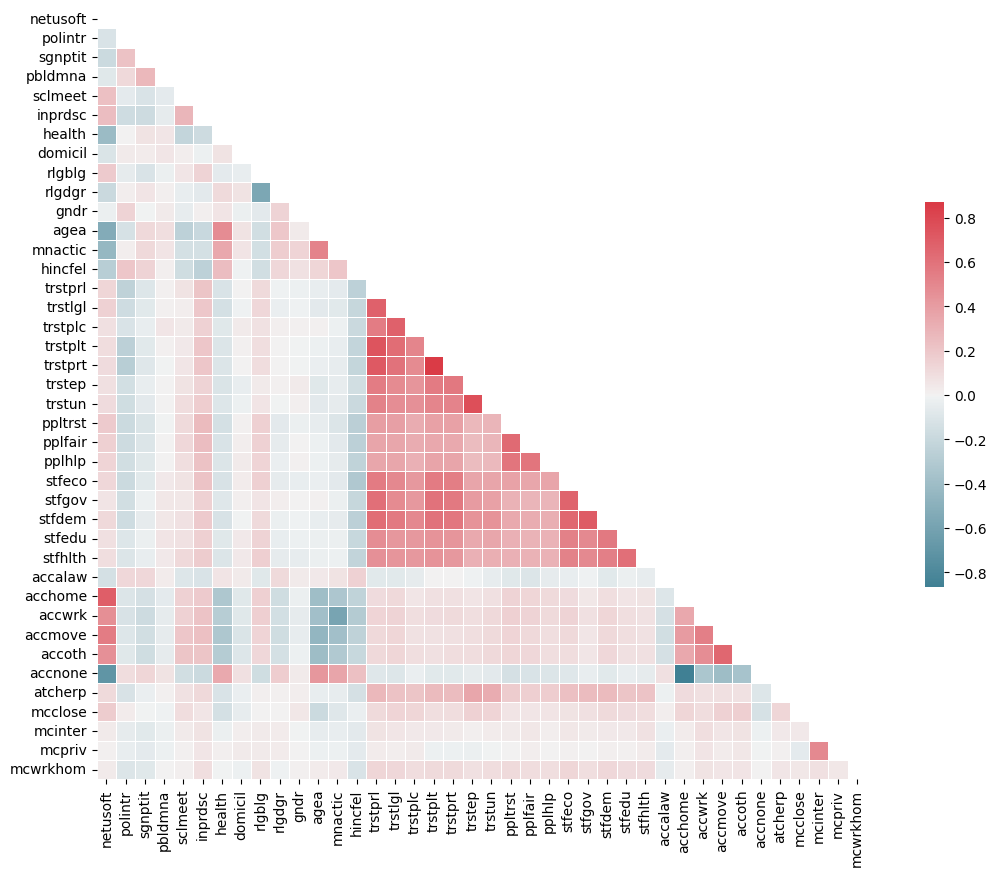

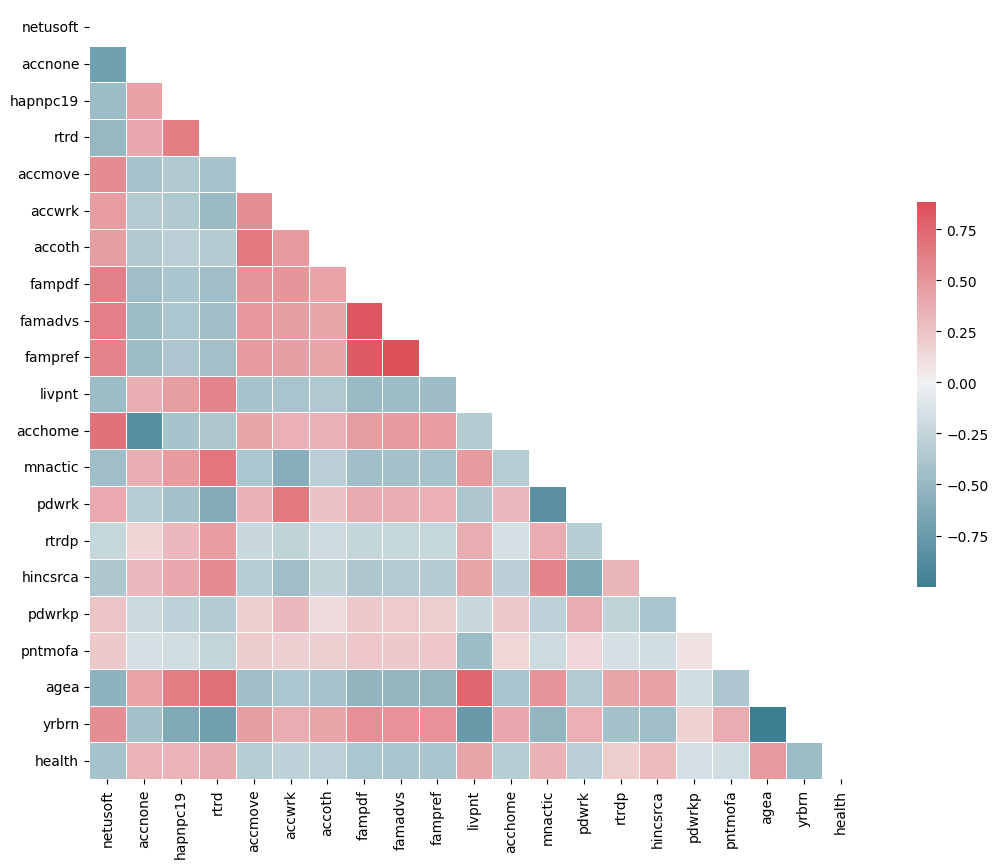

In [65]:
fets = [
    'nwspol', 'polintr', 'sgnptit', 'pbldmna', 'happy', 'sclmeet',     # age, gender, religion, employment, 
    'inprdsc', 'health', 'domicil', 'edulvlb', 'eisced', 'rlgblg',      # education, health, wealth, ...
    'rlgdgr', 'medcrgv', 'gndr', 'agea', 'mainact', 'mnactic', 'hincfel'
] + [t for t in ess.columns if t.startswith('net')      # use of internet
] + [t for t in ess.columns if t.startswith('trst')     # trust
] + [t for t in ess.columns if t.startswith('ppl')      # people
] + [t for t in ess.columns if t.startswith('stf')      # satisfaction
] + [t for t in ess.columns if t.startswith('acc')      # access to internet
] + [t for t in ess.columns if t.startswith('atch')     # emotionally attached
] + [t for t in ess.columns if t.startswith('mc')       # online/mobile communication
]
target = 'netusoft'

fets = [top for top in fets if top != target]
r = result(ess, target, fets, 20)
r = result(ess, target, get_kbest_feats, 20)

In [66]:
ess = ess.drop(['cntry', 'region'], axis=1)

,happy,hincfel,health,stfeco,stfdem,trstprl,trstlgl,netusoft,trstplt,fampdf,famadvs,fampref,accnone,accmove,freehms,accwrk,dngnapp,pdwrkp,accoth,livpnt,hapnpc19
happy,1.0,0.351541,0.324193,0.320787,0.279584,0.261408,0.249135,0.247166,0.229708,0.228046,0.211475,0.202907,0.18661,0.181381,0.17275,0.170223,0.162972,0.160188,0.157693,0.147901,0.101095


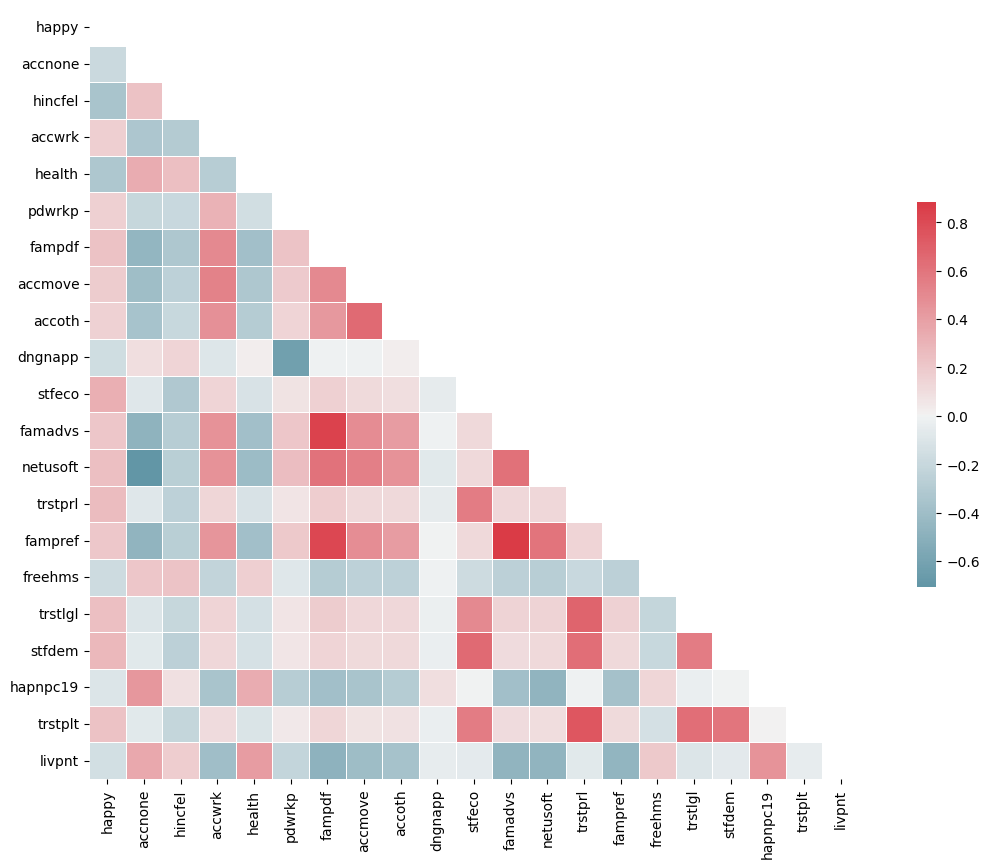

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

fets = [
    'netusoft', 'netustm', 'nwspol', 'polintr', 'eisced', 'agea', 'mainact', 'rlgdgr', 'hincfel', 'domicil', 'stflife'
] + [t for t in ess.columns if t.startswith('mc')       # online/mobile communication
]

model = XGBClassifier()
X, y = result(ess, 'happy', get_kbest_feats, 20)
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [74]:
y_train.value_counts()

8     6676
7     4913
9     3486
10    2641
6     2621
5     2562
4      844
3      651
2      321
0      168
1      130
Name: happy, dtype: int64

In [75]:
from imblearn.over_sampling import SMOTE
# resampling

X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [76]:
y_train.value_counts()

9     6676
4     6676
3     6676
8     6676
6     6676
5     6676
10    6676
2     6676
7     6676
0     6676
1     6676
Name: happy, dtype: int64

In [77]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test)
decimals = 5

print(
    "train_acc:", round(model.score(X_train, y_train),decimals), 
    "  test_acc:", round(model.score(X_test, y_test),decimals), 
    "  precision:", round(precision_score(y_test, preds, average='macro'),decimals), 
    "  recall:", round(recall_score(y_test, preds, average='macro'),decimals), 
    "  f1:", round(f1_score(y_test, preds, average='macro'),decimals), "\n"
    )
pd.DataFrame(confusion_matrix(y_test, preds))

train_acc: 0.77192   test_acc: 0.29432   precision: 0.20132   recall: 0.17969   f1: 0.18303 



,0,1,2,3,4,5,6,7,8,9,10
0,9,2,7,2,1,19,3,6,5,0,4
1,4,1,4,7,3,12,6,4,7,1,2
2,4,1,6,9,6,22,9,13,17,3,12
3,7,3,15,16,14,56,22,40,27,5,14
4,2,1,7,12,18,67,28,64,64,1,11
5,12,1,18,31,41,195,76,194,209,20,48
6,5,1,6,25,9,127,88,250,290,26,41
7,2,3,6,28,25,154,103,500,746,82,79
8,3,4,5,11,12,129,70,377,1187,245,122
9,1,1,1,4,4,43,15,135,630,226,100
